# Decision Tree to Predict Diabetes- using Entropy, Gini and Random Forest. 

We are using the PIMA data set to make predictions of Diabetes. 
Here we are using Entropy and Gini. Later we use Random Forest to build a model.


In [1]:
#import sys
#!conda install --yes --prefix {sys.prefix} pydotplus

#import sys
#!conda install --yes --prefix {sys.prefix} pydotplus


In [2]:
# Load libraries
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)



In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [6]:
X


,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
764,2,0,36.8,27,122,70,0.340
765,5,112,26.2,30,121,72,0.245
766,1,0,30.1,47,126,60,0.349


# Splitting the total Data into Train and Test

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Decision Tree with Gini

In [13]:
# Create Decision Tree classifer object
clf_gini = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_gini = clf_gini.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_gini.predict(X_test)

In [14]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: label, Length: 231, dtype: int64

In [16]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


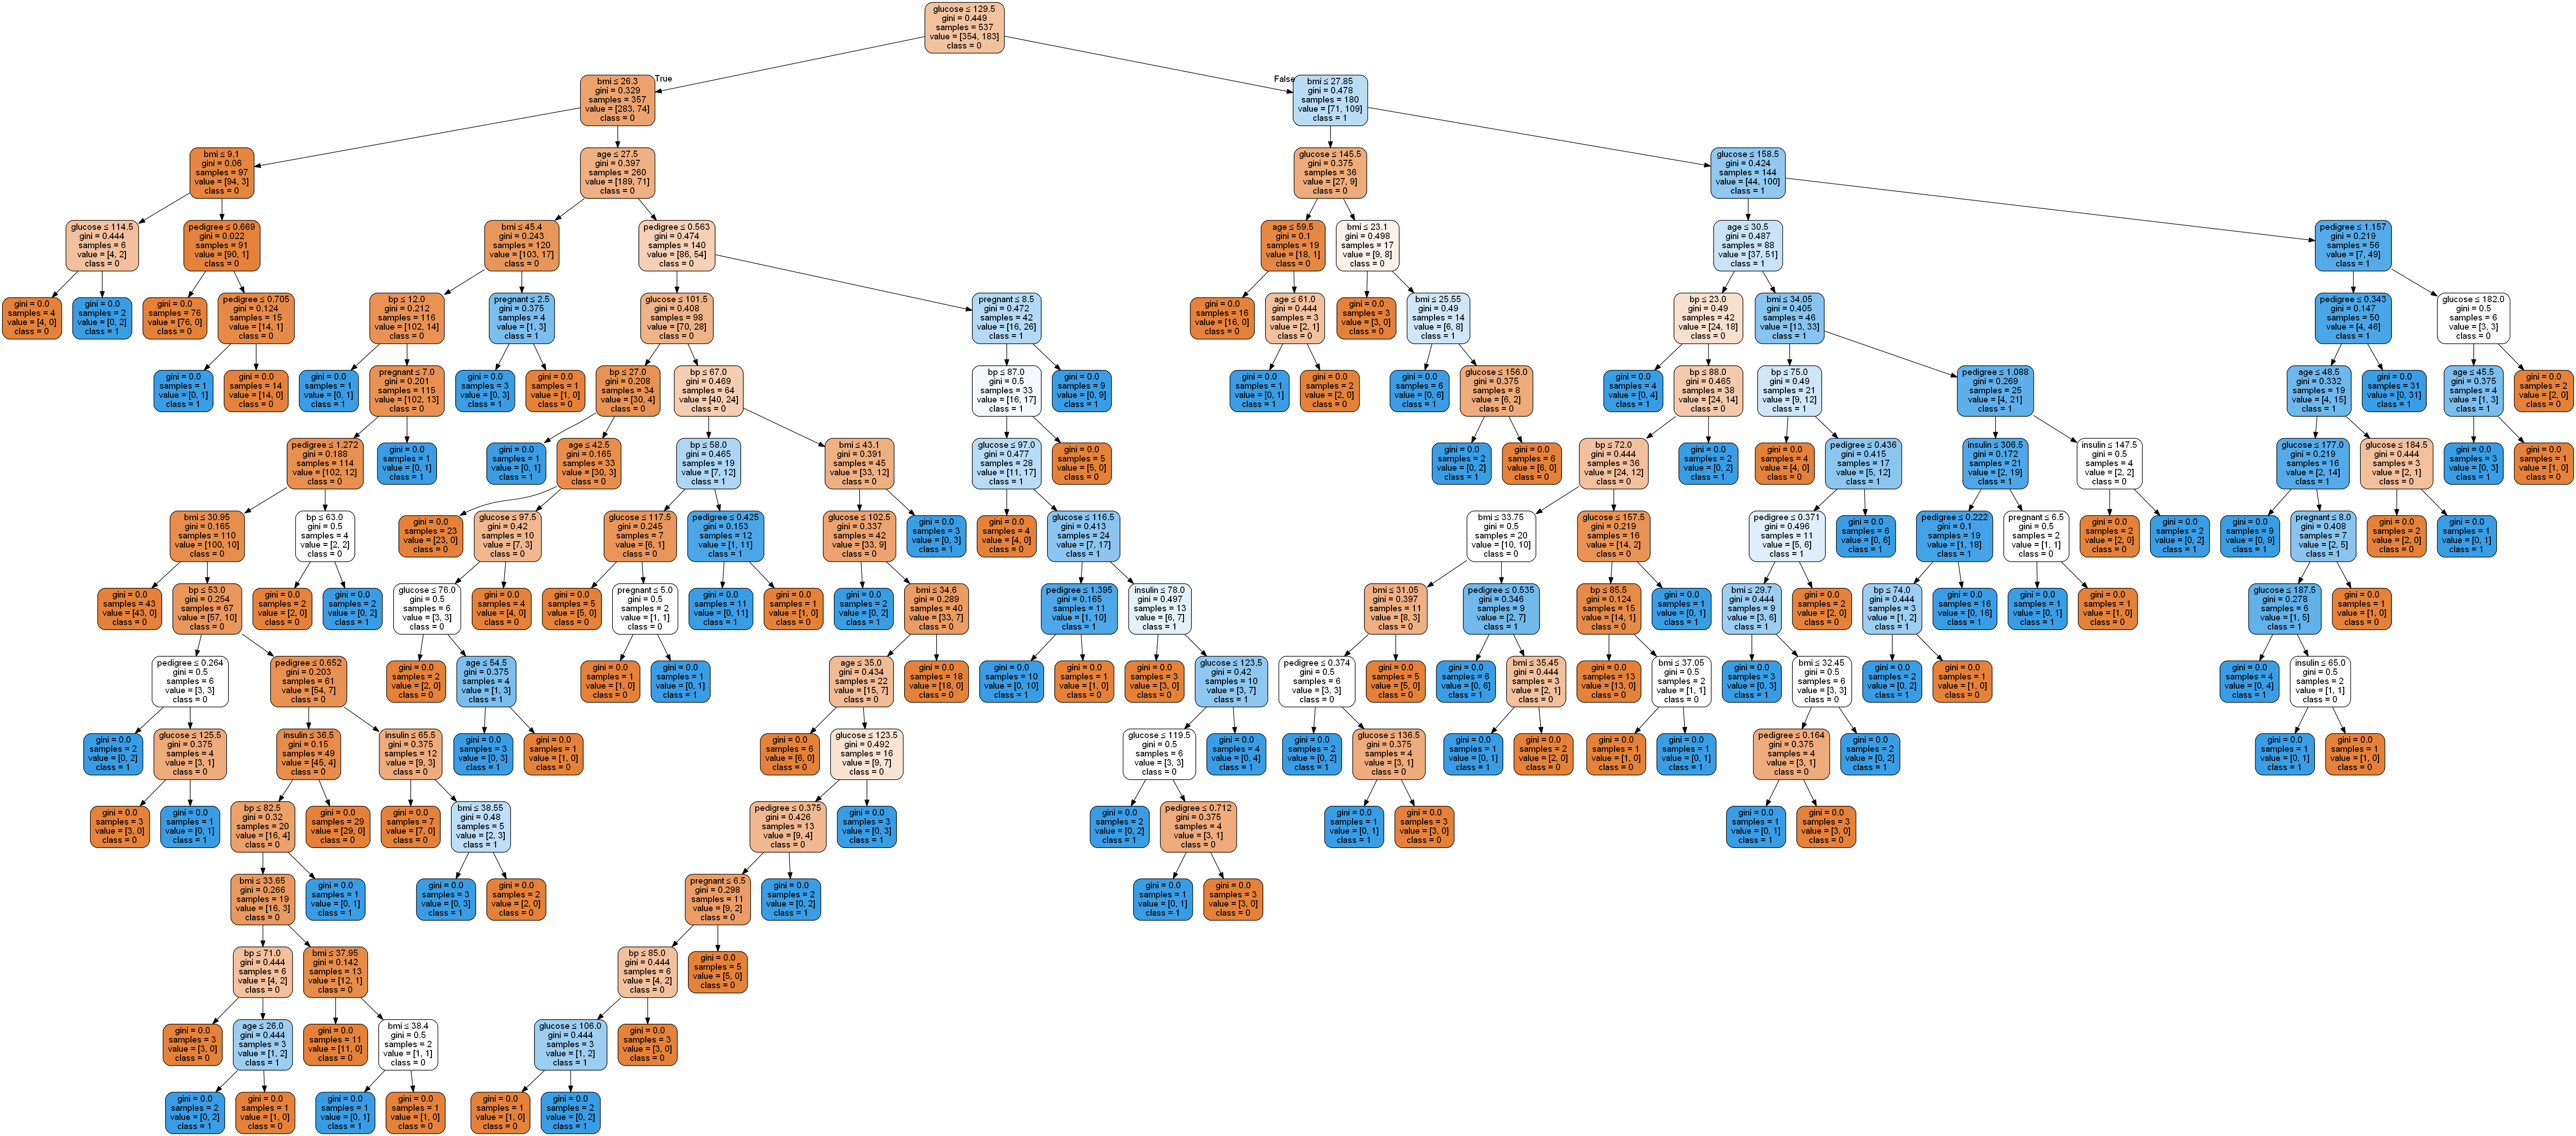

In [23]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
#from sklearn.externals.six 

from IPython.display import Image  

import pydotplus


dot_data = StringIO()
    
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_gini2.png')
Image(graph.create_png())

# Decision Tree with Entropy

In [24]:
# Create Decision Tree classifer object
#clf_ent = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_ent = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf_ent = clf_ent.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_ent.predict(X_test)



In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7402597402597403


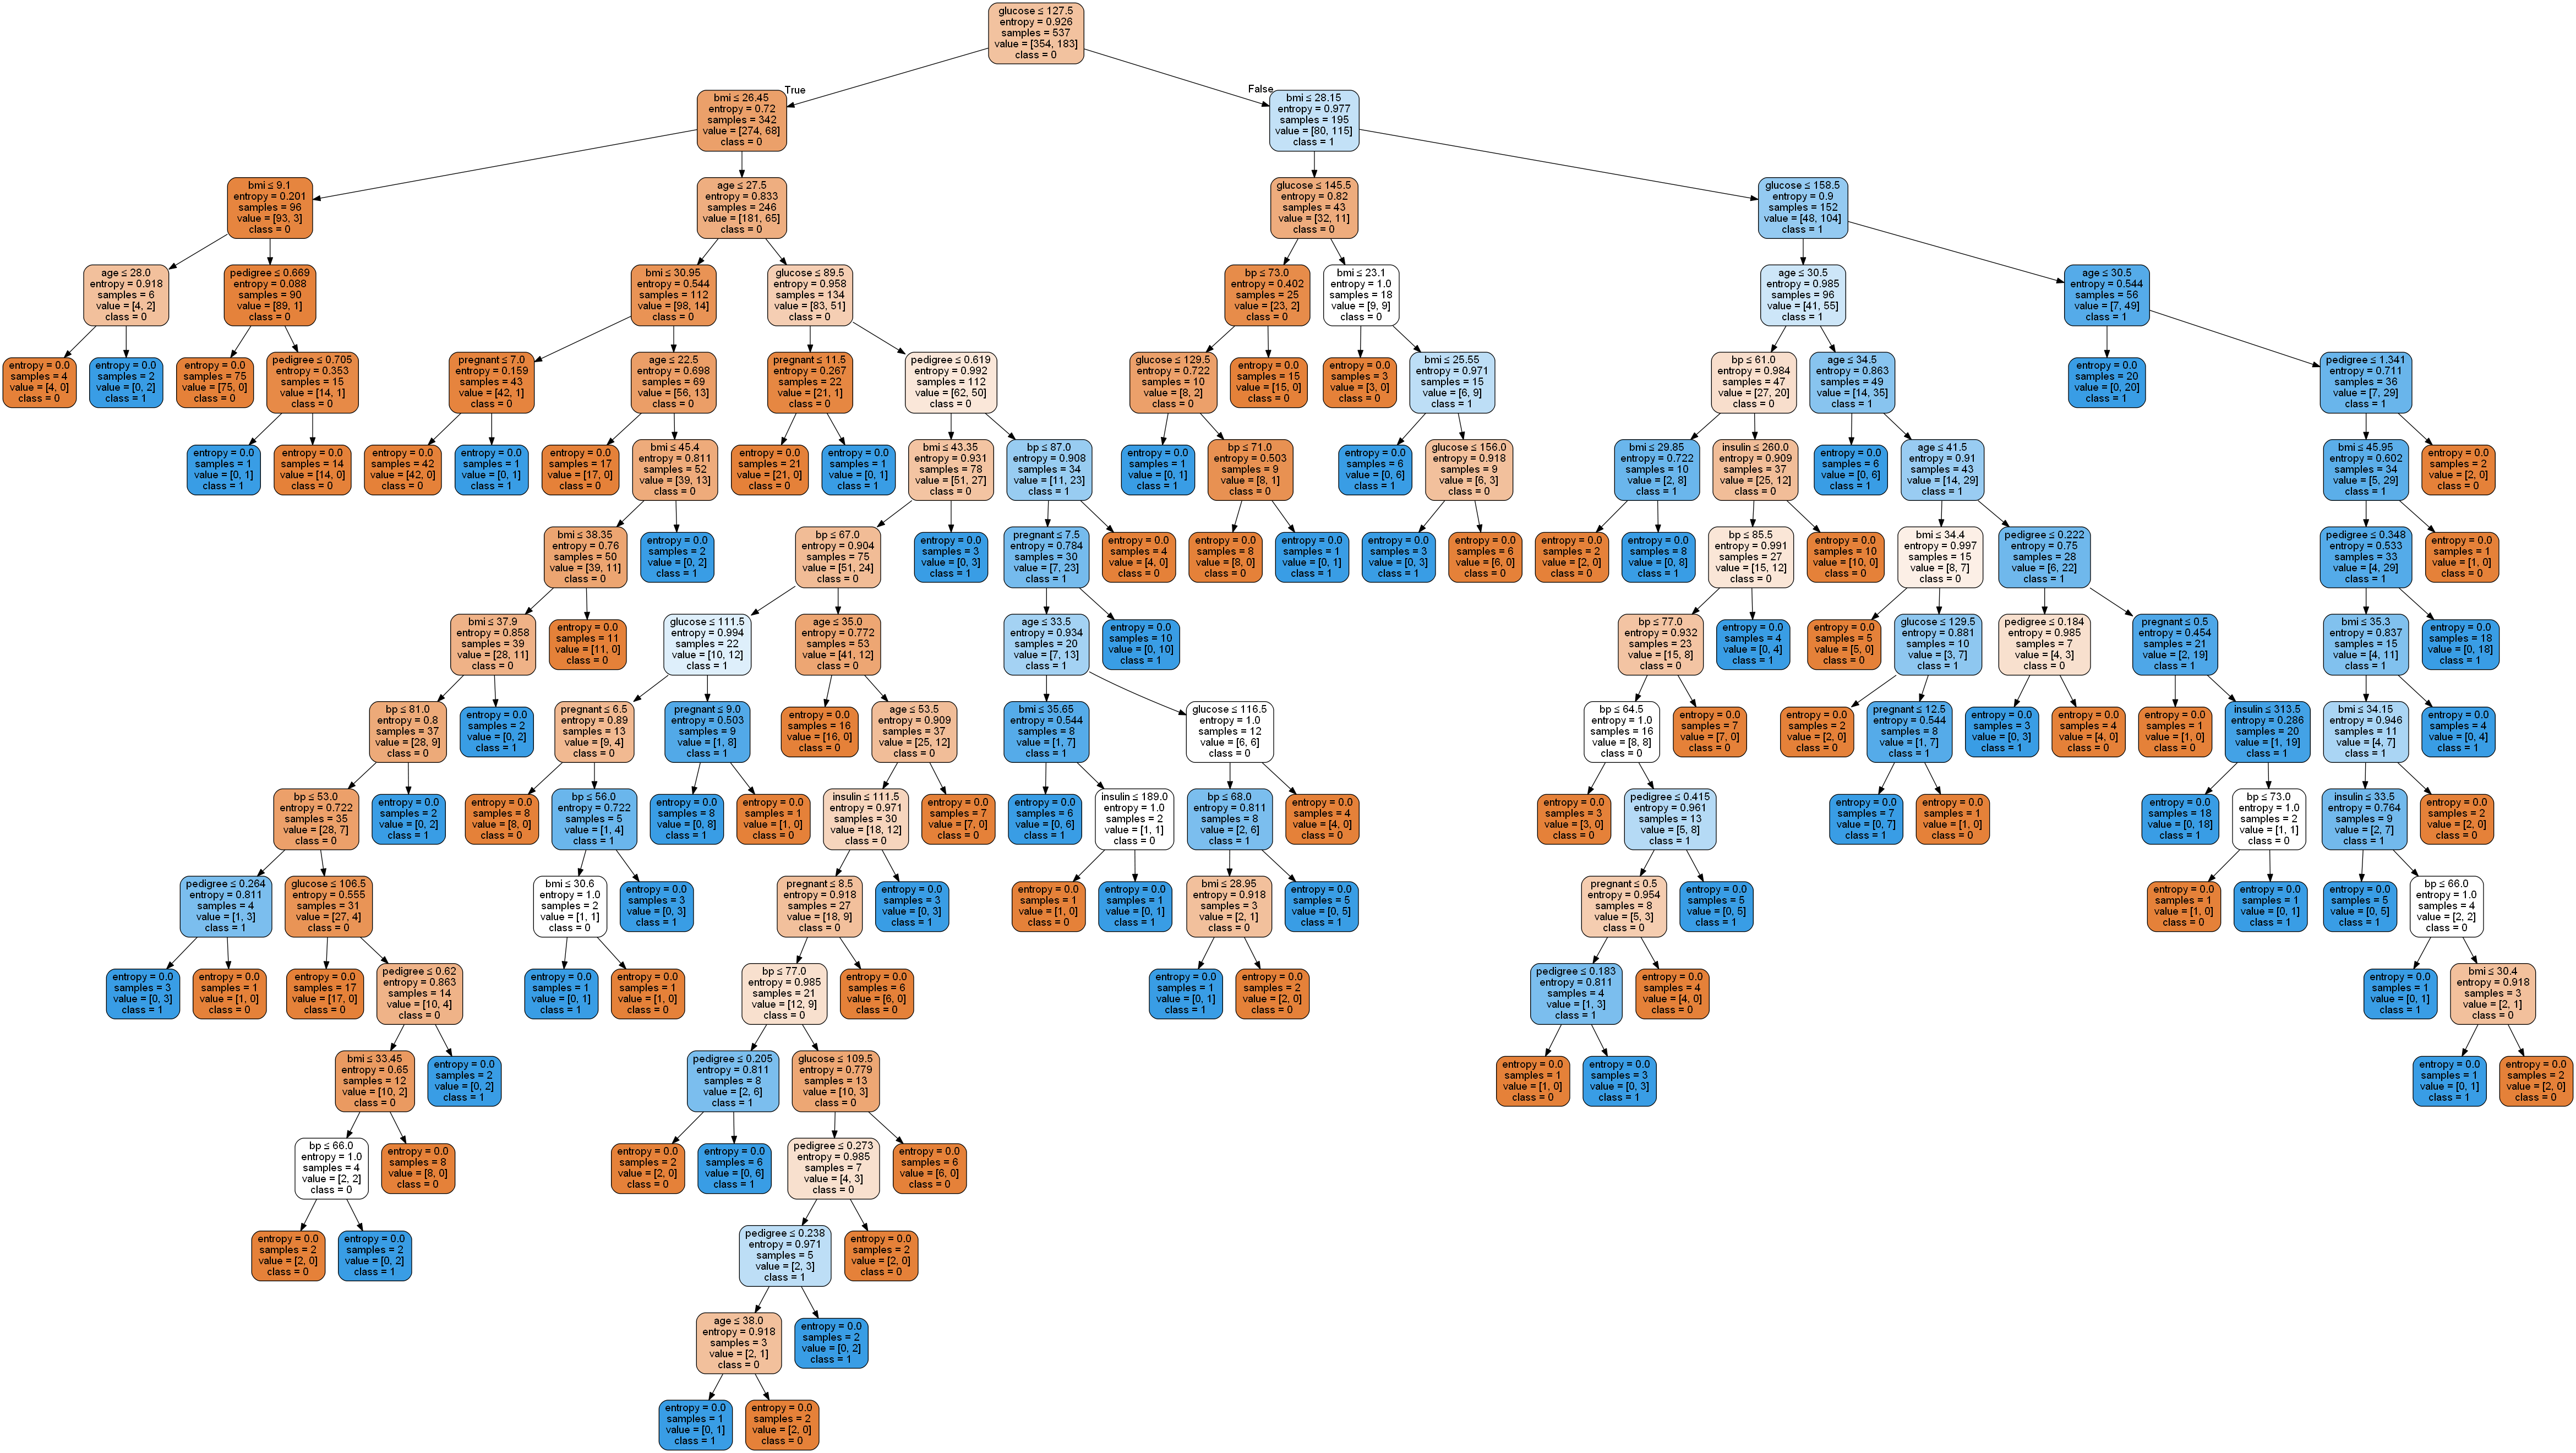

In [26]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_ent, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_ent.png')
Image(graph.create_png())

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

#from sklearn.model_selection import cross_val_score

In [33]:
num_trees = 150
max_features = 5

In [34]:
#RandomModel = RandomForestClassifier()
RandomModel = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

In [35]:

# Train Random Decision Tree Classifer
RandomModel = RandomModel.fit(X_train,y_train)

#Predict the response for test dataset
y_Random_Pred = RandomModel.predict (X_test)


In [37]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_Random_Pred))
print(metrics.confusion_matrix(y_test, y_Random_Pred))

Accuracy: 0.7748917748917749
[[126  20]
 [ 32  53]]


In [38]:
X_train.columns

Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')

In [39]:
type(y_train)


pandas.core.series.Series

# Predict the model with a new set of Test data

In [40]:
#you pass the data as a variable in in the predict. -X_test2

#YTest2_Random_Pred = RandomModel.predict(X_test2)

In [41]:
#print("Accuracy:",metrics.accuracy_score(Y_test2, YTest2_Random_Pred))
#print(metrics.confusion_matrix(Y_test2, YTest2_Random_Pred))

# Plot the Random Forest tree

There a total of 150 tree in the Random Fortest Model. We are print only one tree. We print the first tree-RandomModel.estimators_[0]


In [42]:
print(len(RandomModel.estimators_))

150


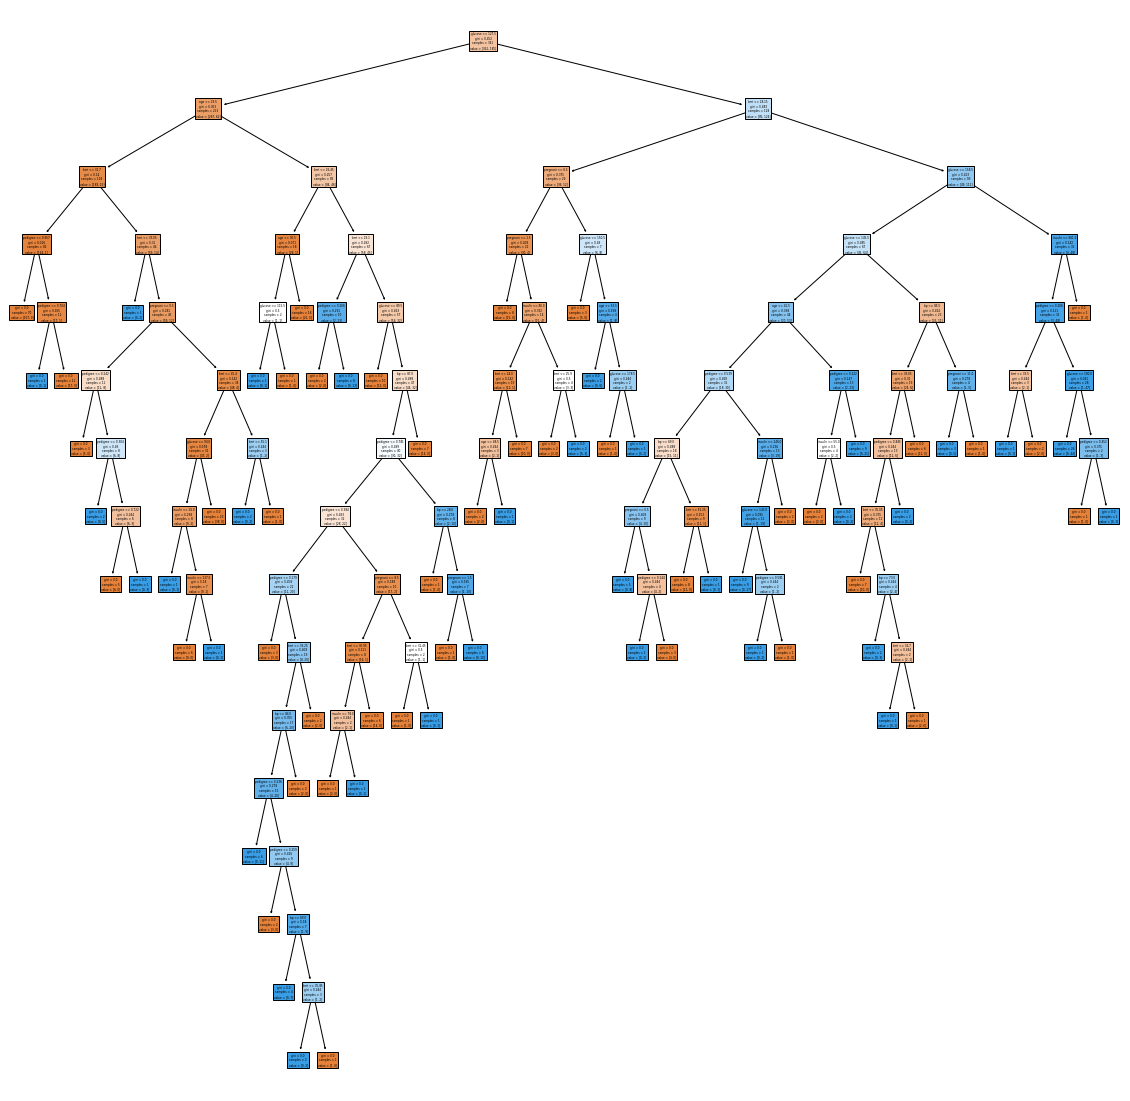

In [43]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
_ = tree.plot_tree(RandomModel.estimators_[1], feature_names=X.columns, filled=True)